In [ ]:
test

In [2]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [4]:
# options
model = IHANKModelClass(name='baseline')
set_options = True
if set_options:


    run_test = False
    save_figs = True

    # Options for figures
    path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
    lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
    path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
    paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
    target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']
    paths_2 = ['PE', 'PT', 'PNT', 'p', 'CT', 'CNT', 'YH', 'P', 'W', 'w', 'PF']
    paths_extended = ['E', 'NTH', 'NNT', 'YTH', 'YNT', 'WTH', 'WNT', 'PTH', 'PNT', 'PF', 'PTH_s', 'PT', 'P', 'PE', 'PTHF', 'PE_s', 'E', 'Q', 'DomP', 'i', 'r_real', 'G', 'B', 'tau', 'div_TH', 'div_NT', 'inc_TH', 'inc_NT', 'ra', 'p', 'n_NT', 'n_TH', 'A_hh', 'C_hh', 'UC_TH_hh', 'UC_NT_hh', 'E_hh', 'CNT_hh', 'CT_hh', 'U_hh', 'CT', 'CNT', 'CTF', 'CTH', 'CTH_s', 'A', 'EX', 'CTHF', 'CE', 'YH', 'W', 'w', 'N', 'INC', 'inc']
    # paths_ = ['YH', 'CT', 'CNT', 'W', 'P', 'w', 'r_real',  'Q', 'p', 'inc', 'INC']
    paths_ = [ 'P', 'W',  'w', 'YH', 'CT', 'CNT', 'r_real', 'Q', 'p', 'CTH_s', 'YTH', 'YNT']

    # Options for shock 

    shock_PE_i, shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 
    
    # Options for tables
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Increase width to avoid line breaks
    pd.set_option('display.colheader_justify', 'center')  # Center column headers

    # Options for comparing models
    ddd = SimpleNamespace()
    ddd.T_max = 50
    ddd.ncols = 3
    ddd.varnames = paths_extended
    ddd.lvl_value = lvl_path
    ddd.do_shocks = False
    ddd.do_targets = False
    ddd.filename = None





    # Parameters to look at 
    # model.par.eta_s = 0.51
    # model.par.etaF = 0.51
    # model.par.nu = 0.7
    # model.par.etaE = 0.01
    # model.par.mon_policy = 'taylor'
    # model.par.phi = 1.5
    # model.par.kappa = 2.0
    # model.par.gamma = 0.4
    # model.par.nu = 0.3


## Models

In [11]:
model_baseline = IHANKModelClass(name='Non-Homothetic Preferences')
model_baseline.find_ss()
model_baseline.compute_jacs(do_print=True)
model_baseline.find_transition_path(shocks=shock_PE_s, do_end_check=False)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for inc_NT          in 1.0 secs
curly_Y and curly_D calculated for inc_TH          in 1.0 secs
curly_Y and curly_D calculated for n_NT            in 0.9 secs
curly_Y and curly_D calculated for n_TH            in 1.0 secs
curly_Y and curly_D calculated for p               in 0.9 secs
curly_Y and curly_D calculated for ra              in 0.9 secs
curly_E calculated in 0.4 secs
builiding blocks combined in 2.5 secs
household Jacobian computed in 8.7 secs

full Jacobians:
full Jacobian to unknowns computed in 23.5 secs [in evaluate_blocks(): 19.9 secs]
full Jacobian to shocks computed in 6.4 secs [in evaluate_blocks(): 2.6 secs]


In [6]:
model.H_U.shape

(3500, 3500)

In [ ]:
model_baseline.find_transition_path(shocks=shock_PE_s, do_end_check=False, do_print=True)

In [4]:
model_homothetic = IHANKModelClass(name='Homothetic Preferences')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [90]:
model.ss.pol_weights.shape


(1, 2, 7, 500)

In [5]:
models = [model_baseline, model_homothetic]

## Shock

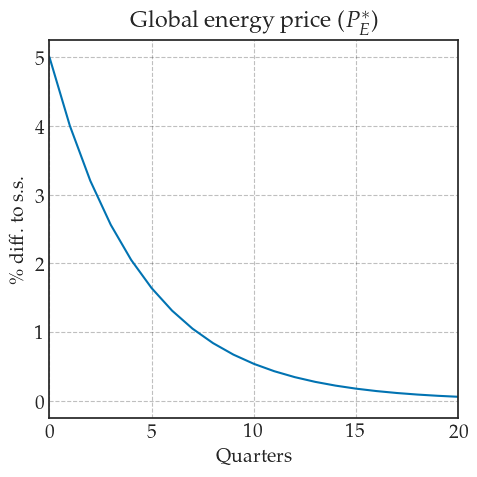

In [6]:
fig = figs.plot_PE_s(model_baseline)
if save_figs: fig.savefig('plots/PE_shock.png')

## Jacobians 

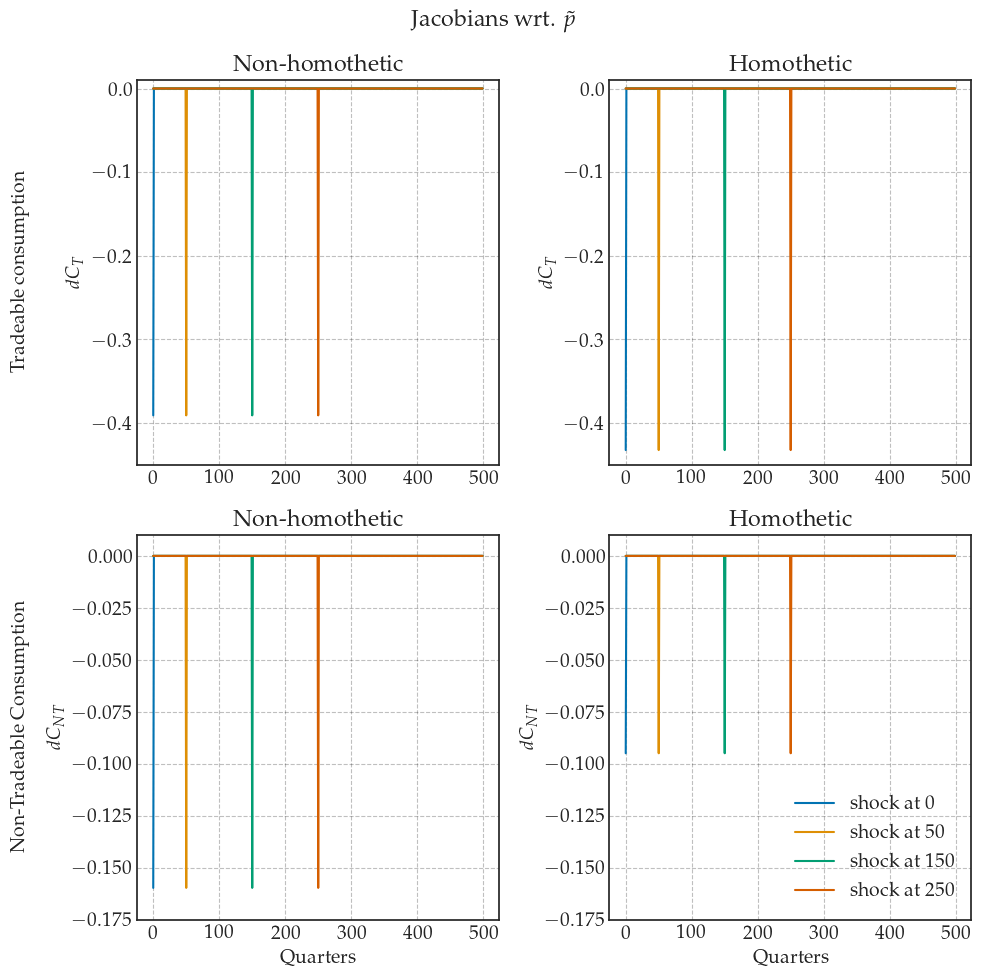

In [7]:
fig = figs.plot_jac_p(models)
if save_figs: fig.savefig('plots/jac_p.png')

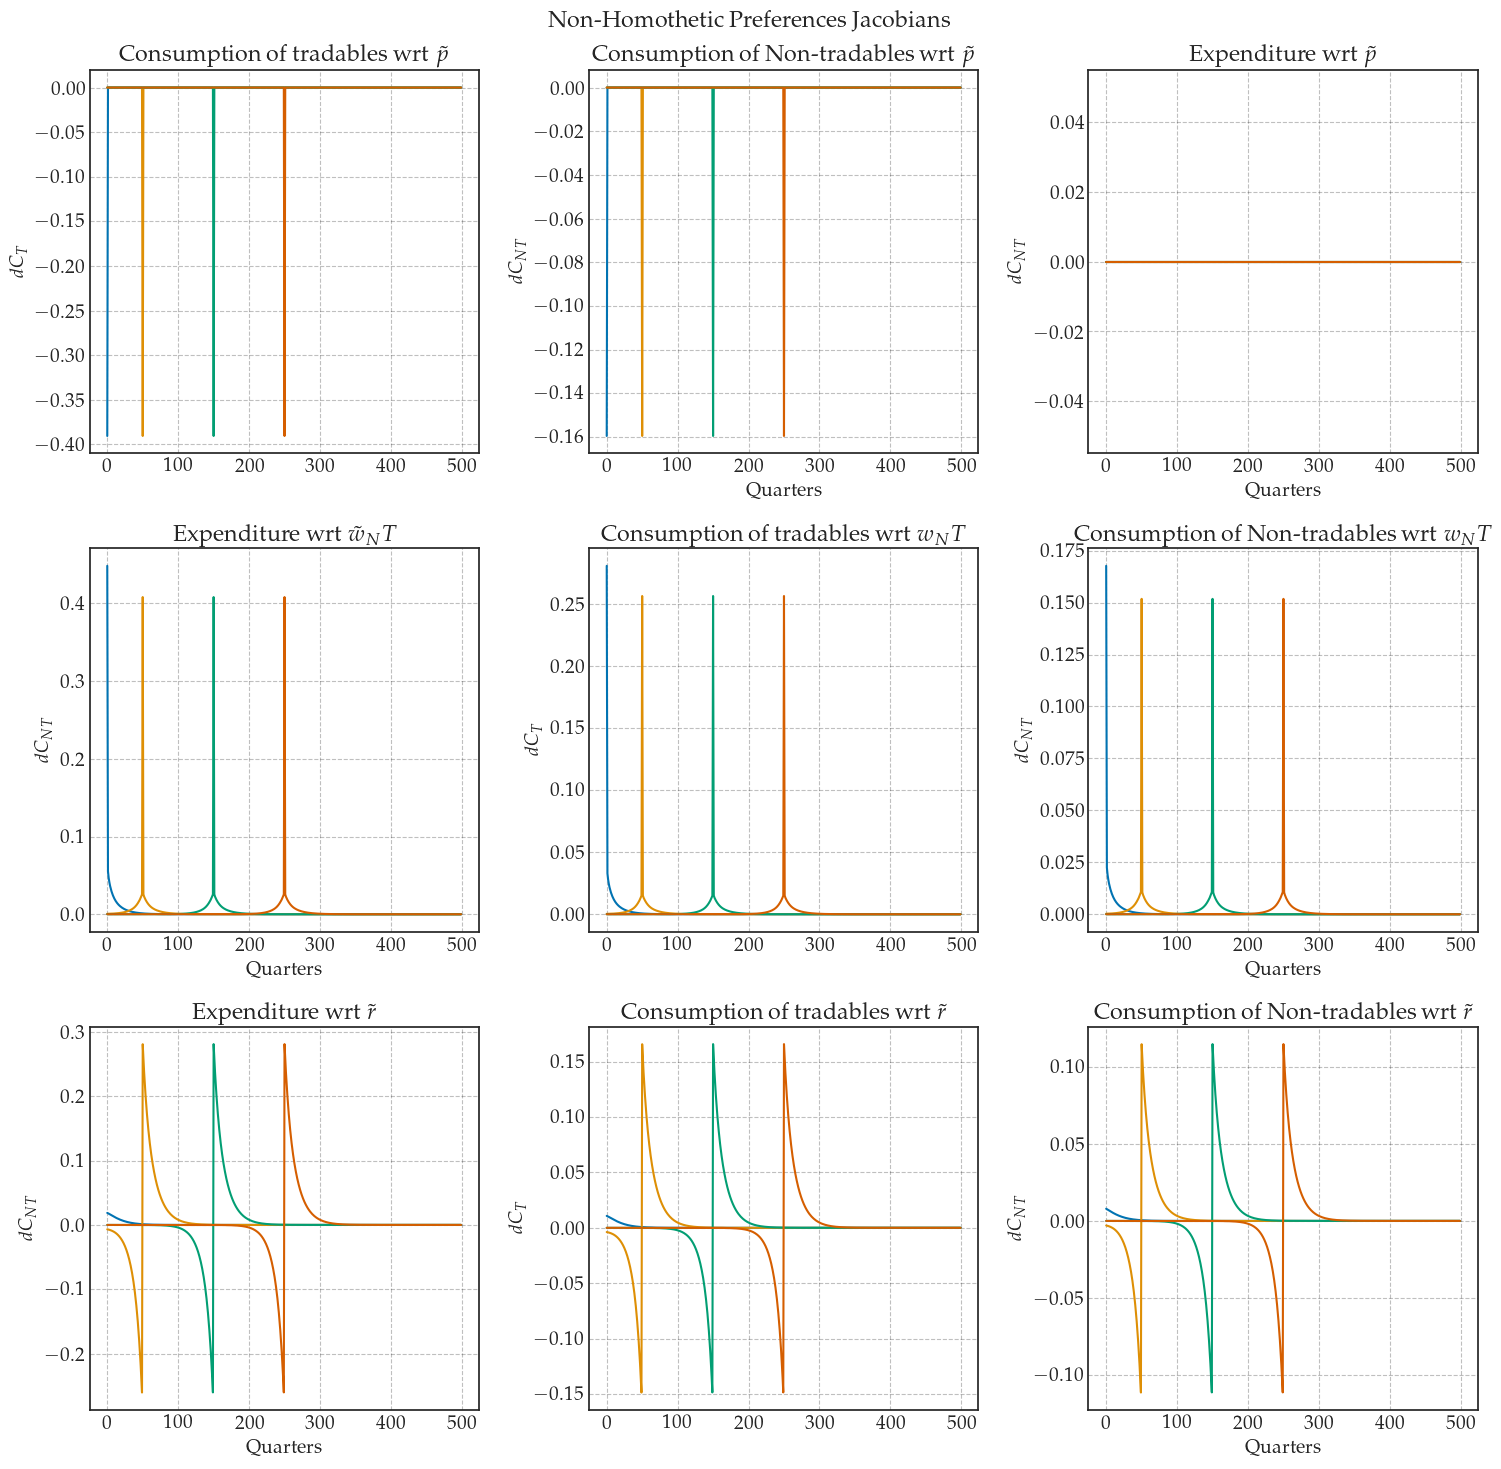

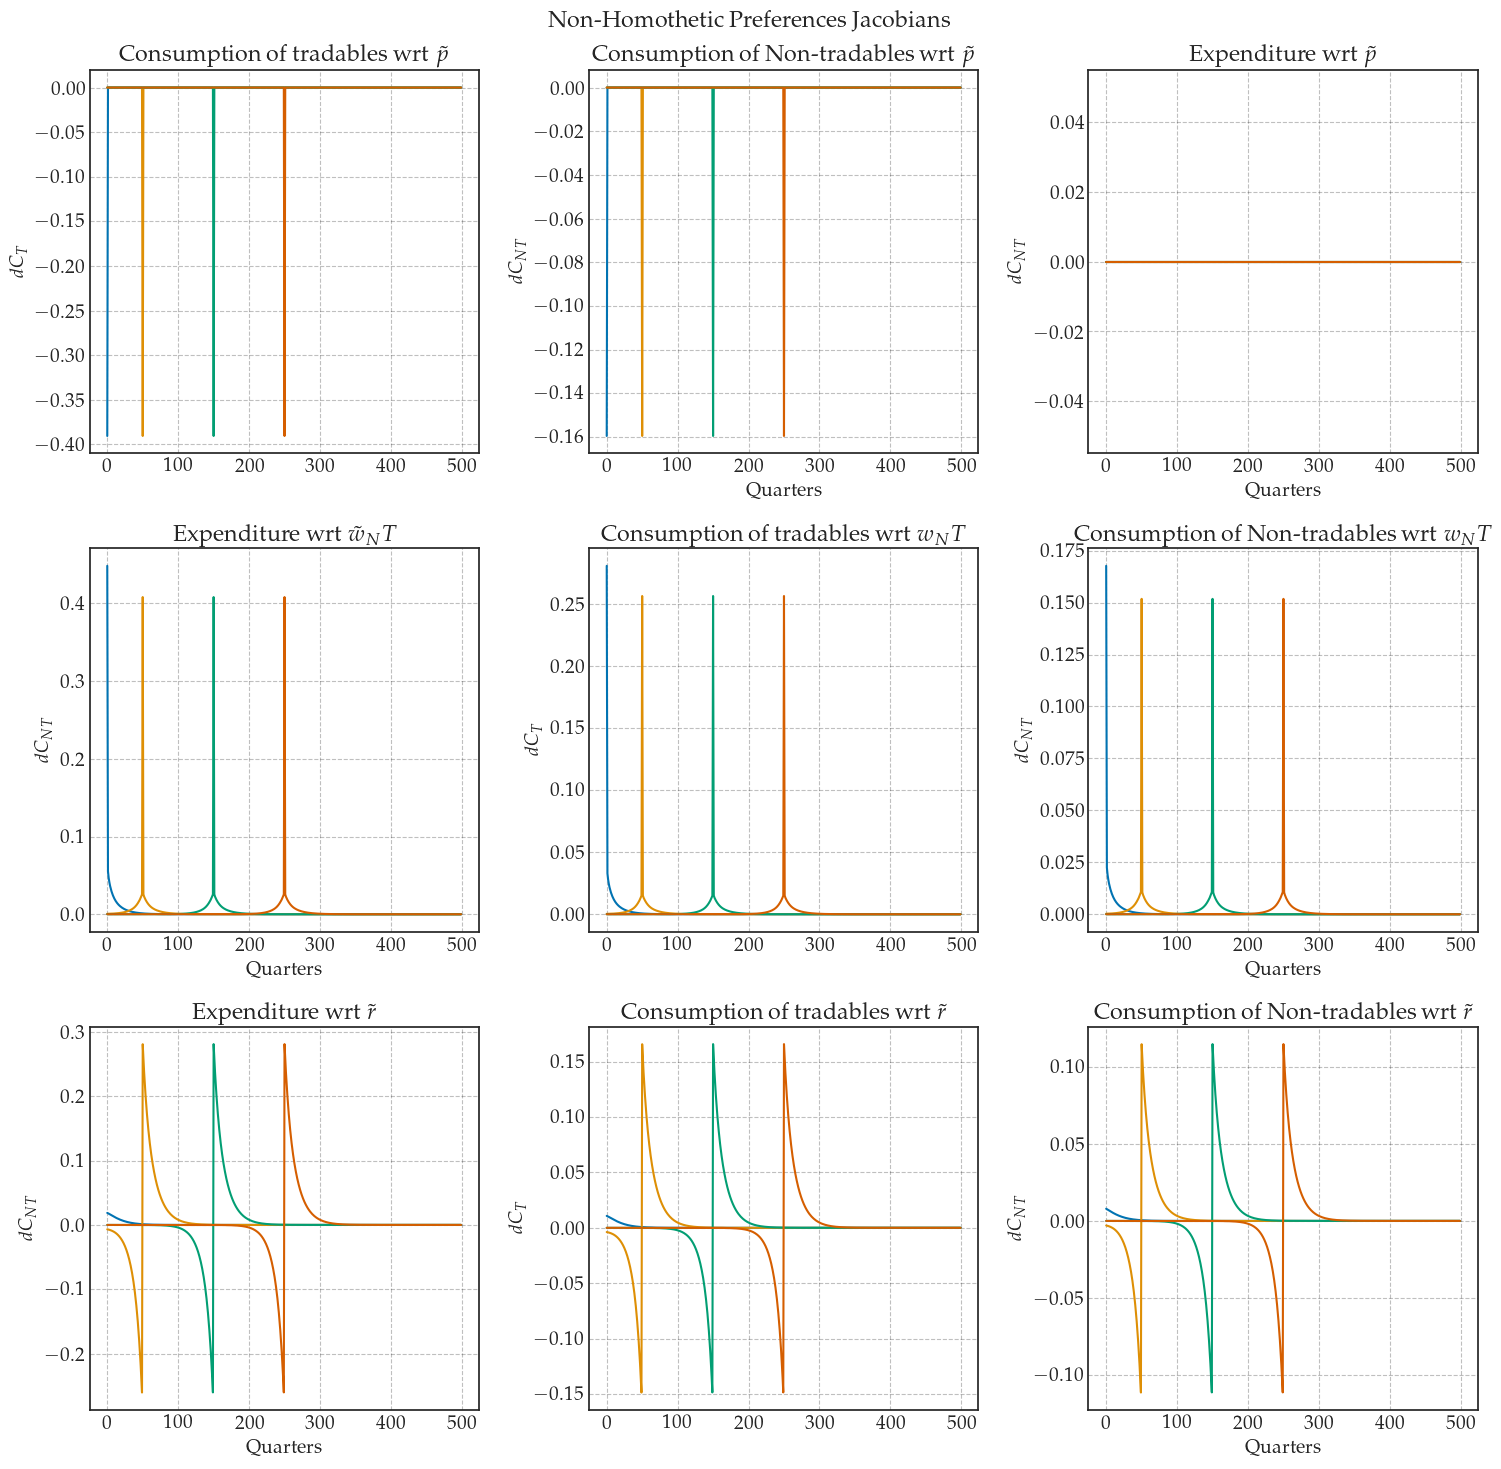

In [8]:
# All jacobians
figs.plot_jac(model_baseline)

### IRF's 

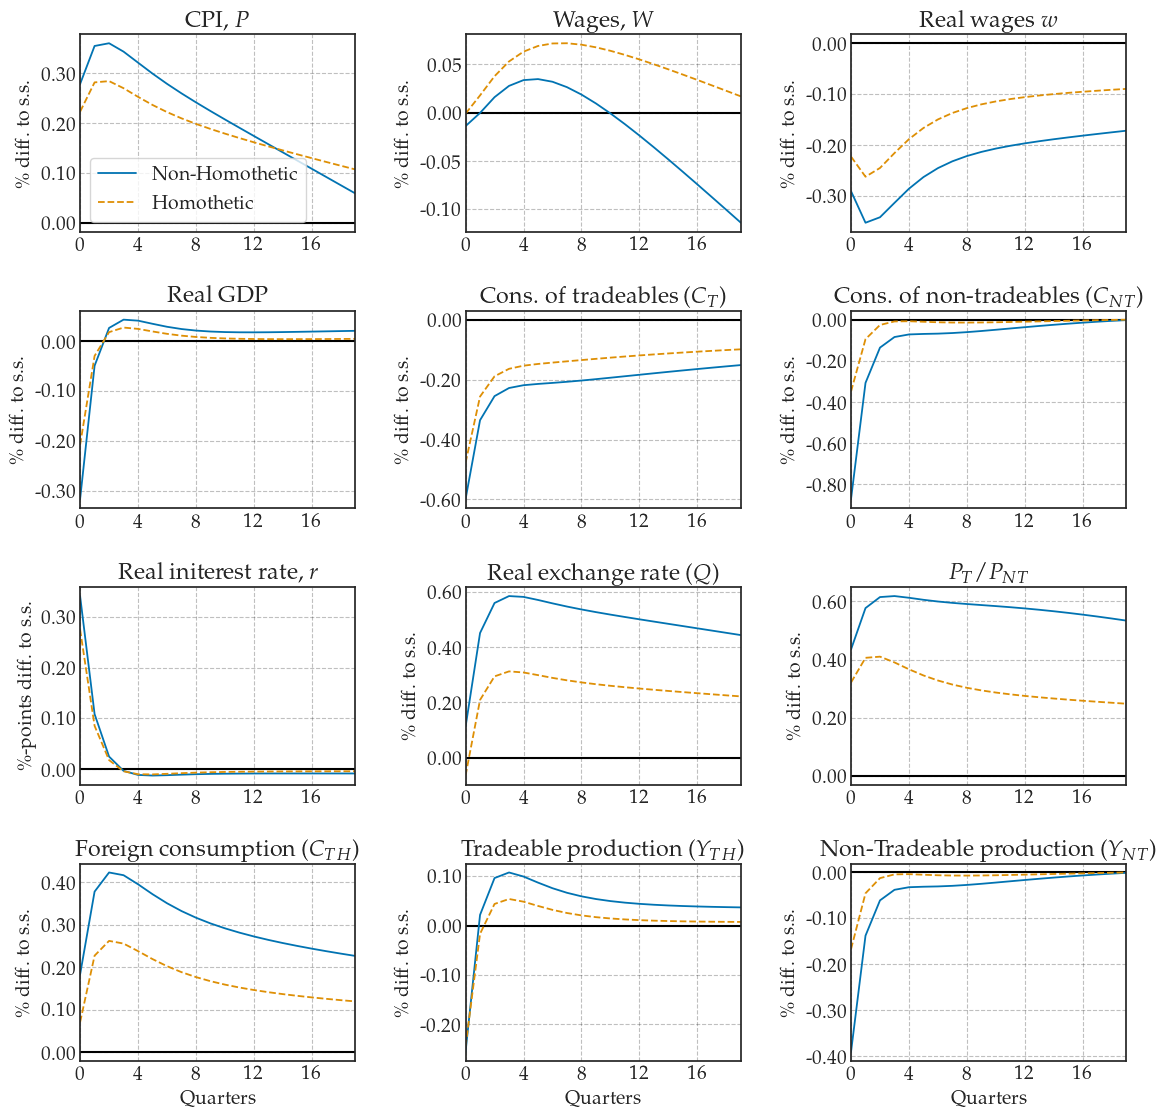

In [9]:


fig = figs.show_IRFs([model_baseline, model_homothetic], paths_, ['Non-Homothetic', 'Homothetic'], scale=False, maxcol=3)
fig.savefig('plots/IRF_standard.png')

## Decomposition

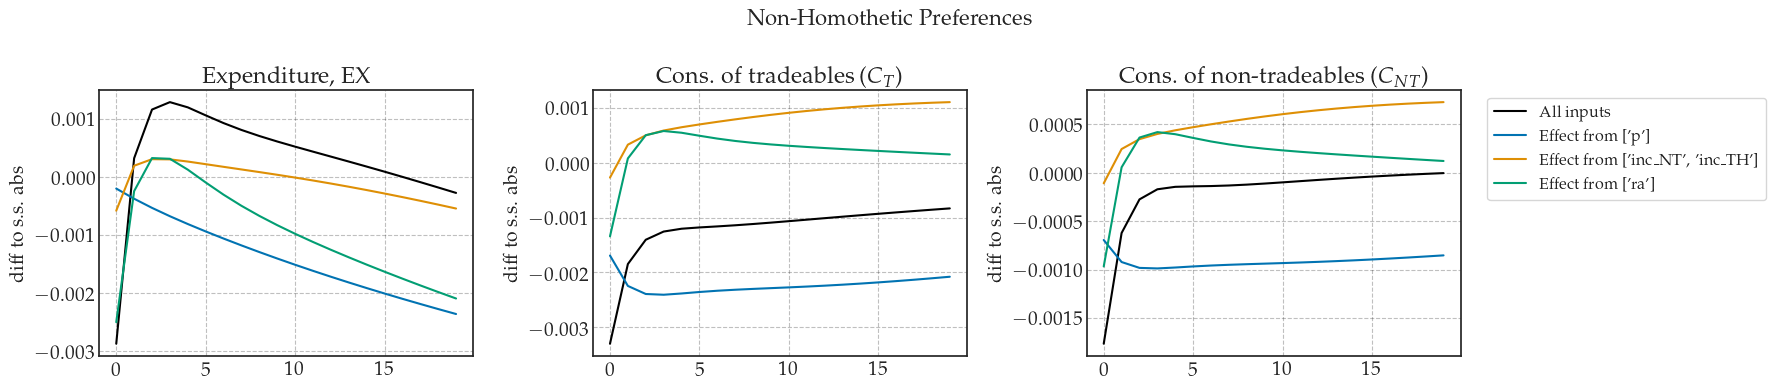

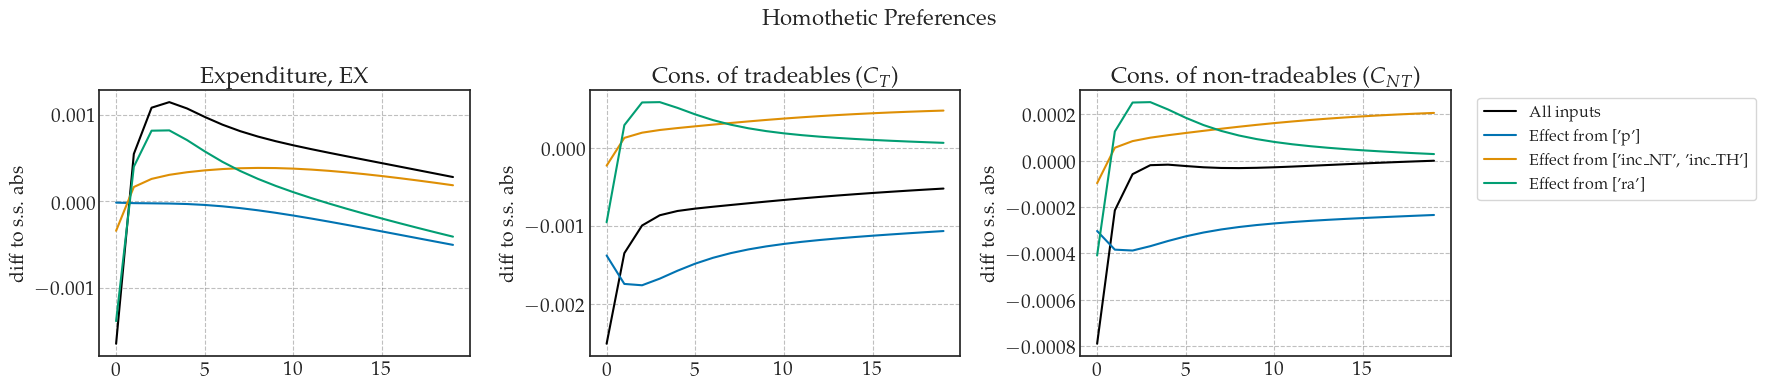

In [10]:
for model in models:
   fig = figs.plot_dec(model)
   fig.savefig(f'plots/dec_{model.name}.png')

## Prices

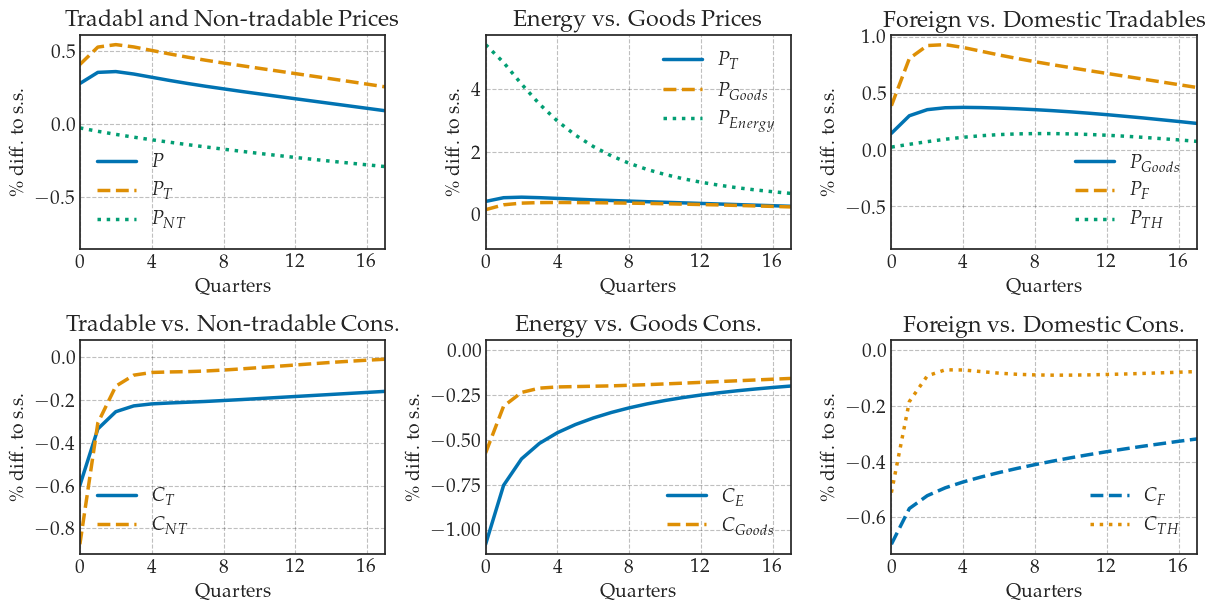

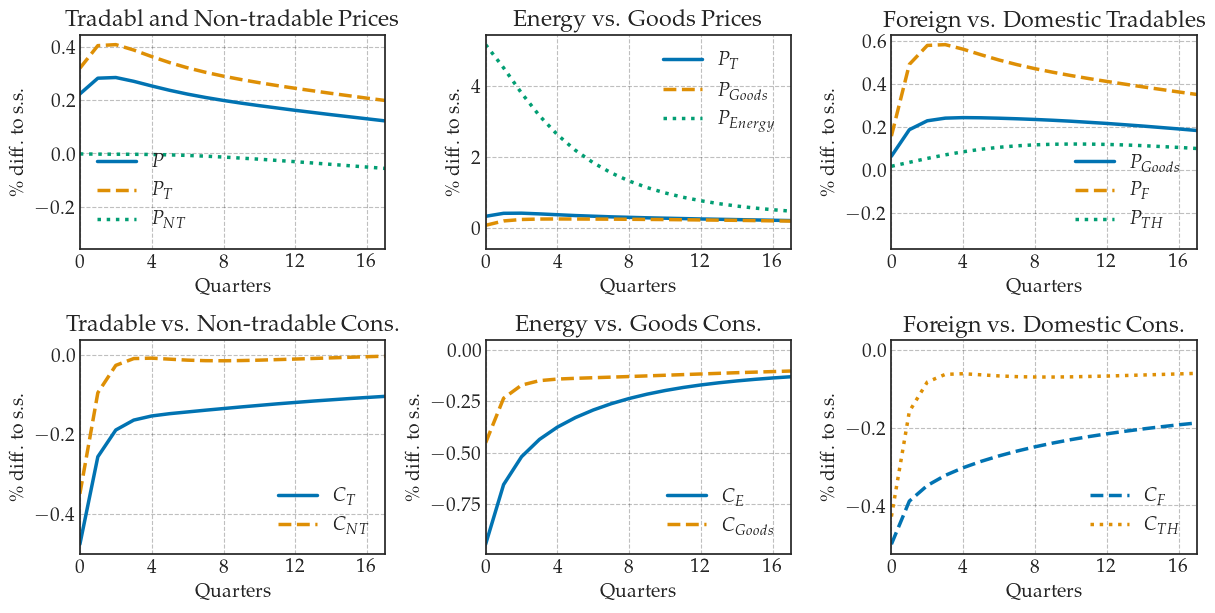

In [11]:
for model in models:
    fig =  figs.show_pc_IRFs(model)
    if save_figs: fig.savefig(f'plots/pc_IRF_{model.name}.png', dpi=300, bbox_inches='tight')

# fig = figs.show_pc_IRFs(model_baseline)
# fig.savefig( f'plots/pc_IRF_{model_baseline.name}.png', dpi=300, bbox_inches='tight')

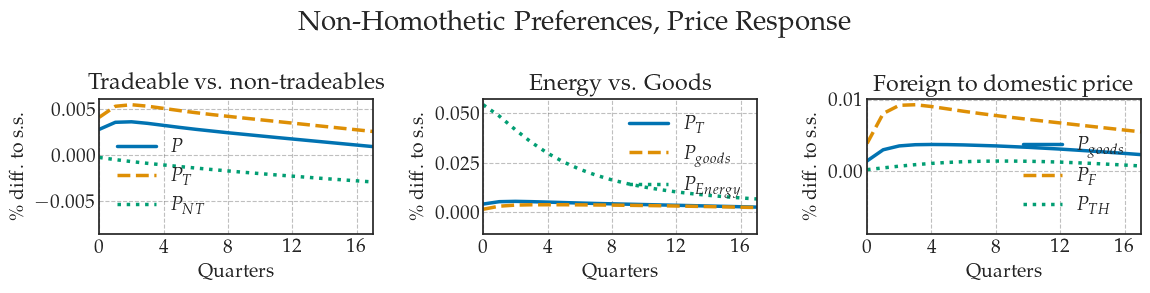

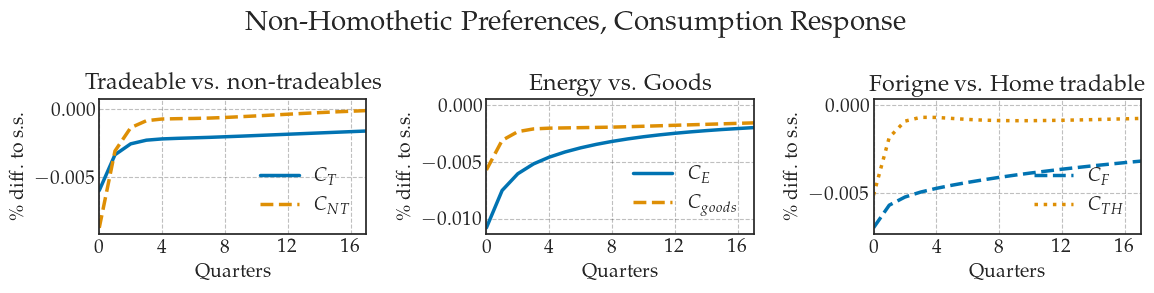

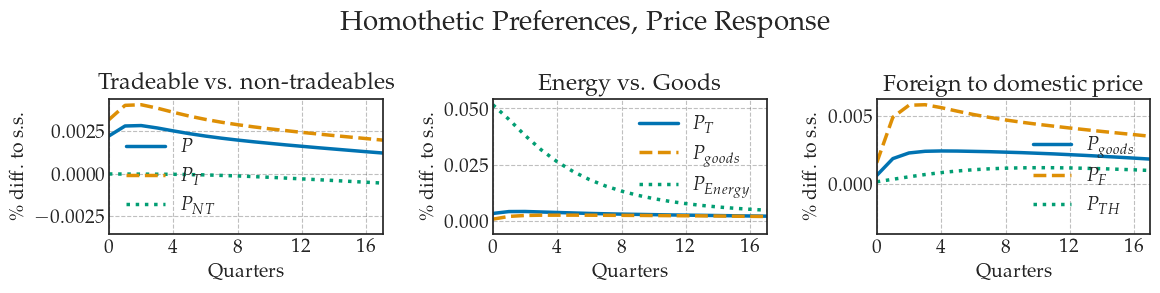

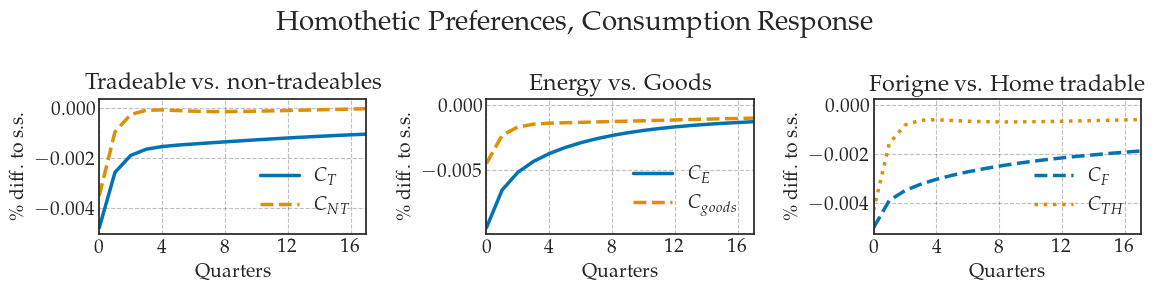

In [12]:
for model in models:
    fig =  figs.show_price_IRFs(model)
    if save_figs: fig.savefig(f'plots/P_{model.name}.png')   
    fig = figs.show_c_IRFs(model)
    if save_figs: fig.savefig(f'plots/c_{model.name}.png')


# Sensitivity 


## Comparing with model with lower IES 

0.40000000000000013


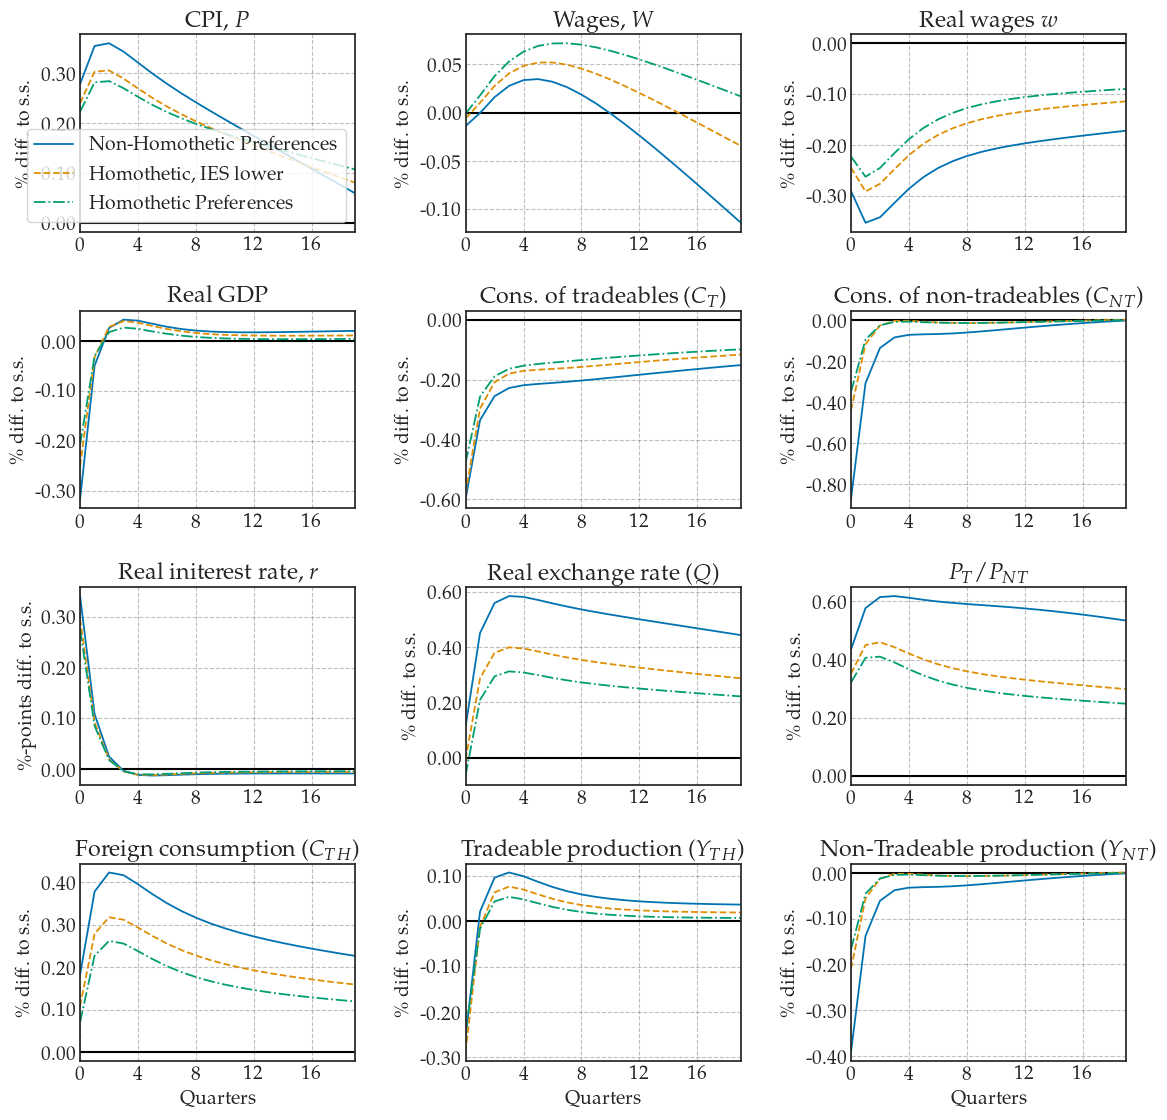

In [13]:
model_homothetic_epsilon = IHANKModelClass(name='Homothetic, IES lower')
# model_homothetic_epsilon.par.epsilon = 0.0
model_homothetic_epsilon.par.gamma = 0.18
model_homothetic_epsilon.par.brute_force_C = True
model_homothetic_epsilon.par.pref = 'homothetic_force'
model_homothetic_epsilon.find_ss()

model_homothetic_epsilon.compute_jacs()
model_homothetic_epsilon.find_transition_path(shocks=shock_PE_s, do_end_check=False)
print(model_homothetic_epsilon.par.eta_T_RA)
fig = figs.show_IRFs([model_baseline, model_homothetic_epsilon, model_homothetic], paths_, labels=[model_baseline.name, model_homothetic_epsilon.name,  model_homothetic.name],  scale=False, maxcol=3)
if save_figs: fig.savefig('plots/IRF_homothetic_epsilon.png', dpi=300, bbox_inches='tight')

ValueError: x and y can be no greater than 2D, but have shapes (20,) and (20, 2, 7, 500)

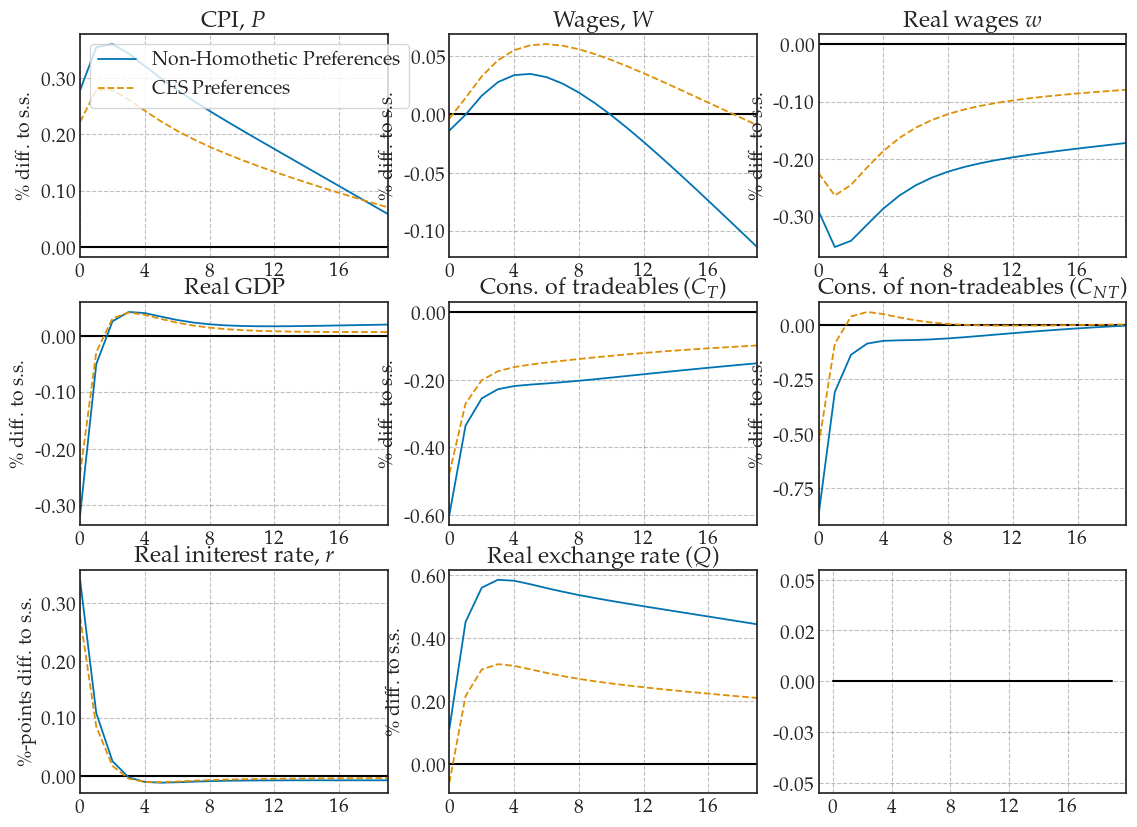

In [18]:
figs.show_IRFs([model_baseline, model_CES], paths_, labels=[model_baseline.name, model_CES.name],  scale=False, maxcol=3)

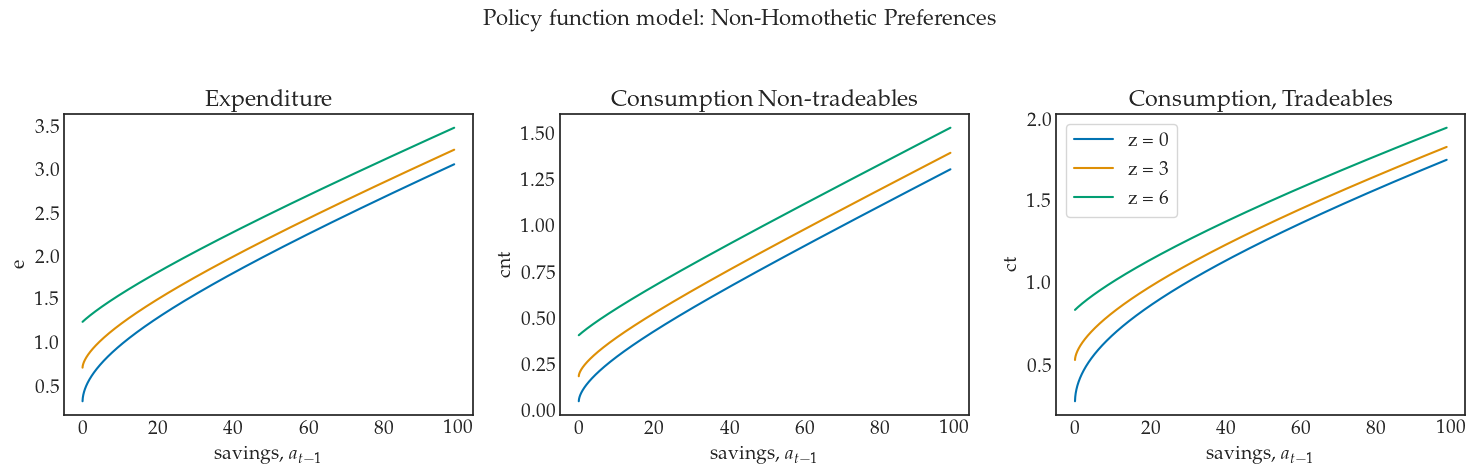

In [35]:
fig = figs.plot_policy(model_baseline, ['e', 'cnt', 'ct'])
# if save_figs: fig.savefig('plots/policy.png', dpi=300, bbox_inches='tight')
fig.savefig('plots/policy.png', dpi=300, bbox_inches='tight')

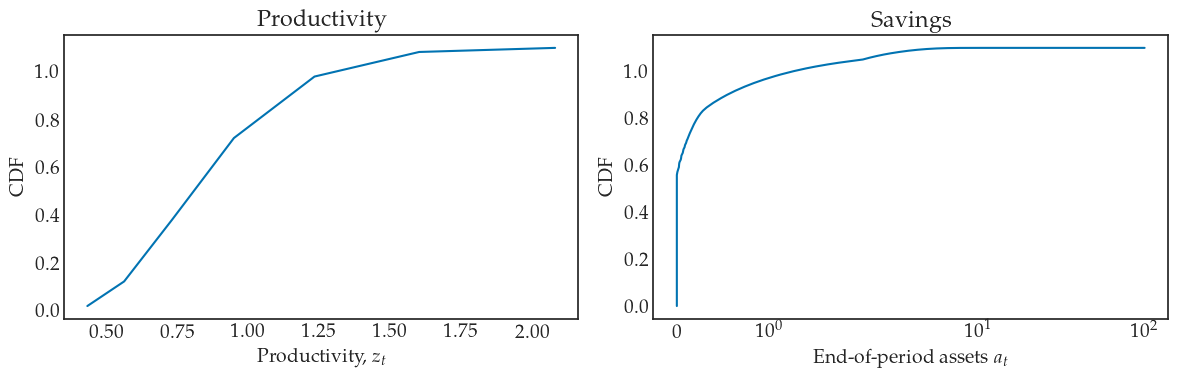

In [83]:

def cum_z_a(model):
    fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
    ax = fig.add_subplot(1,2,1)
    ax.set_title('Productivity')

    ax.plot(model.par.z_grid,np.cumsum(np.sum(model.ss.D[0],axis=1))*model.par.Nfix)

    ax.set_xlabel('Productivity, $z_{t}$')
    ax.set_ylabel('CDF')


    # b. amodel.ssets
    ax = fig.add_subplot(1,2,2)
    ax.set_title('Savings')

    ax.plot(np.insert(model.par.a_grid,0,model.par.a_grid[0]),np.insert(np.cumsum(np.sum(model.ss.D[0],axis=0)),0,0.0)*model.par.Nfix,label=f'$\\beta = ')
    ax.set_xlabel('End-of-period assets $a_{t}$')
    ax.set_ylabel('CDF')
    ax.set_xscale('symlog')

    fig.tight_layout()  
    return fig
fig = cum_z_a(model_baseline)
if save_figs: fig.savefig('plots/cum_z_a.png', dpi=300, bbox_inches='tight')
# fig.savefig('figs/distribution.pdf')

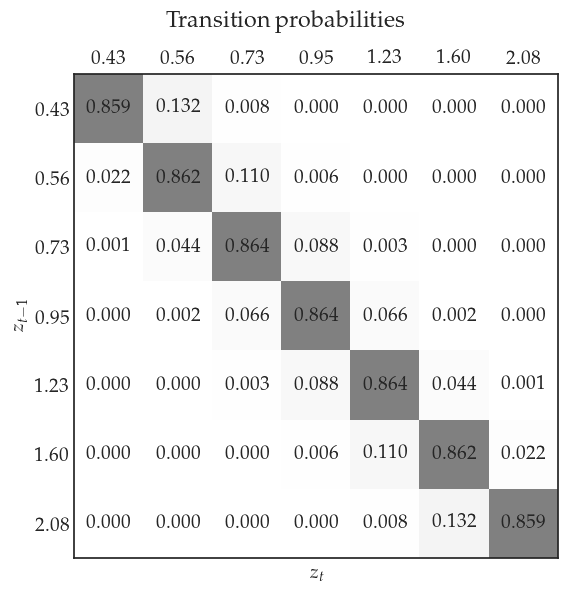

In [86]:
# model.par.z_grid


par = model.par
model.par.z_trans = model.ss.z_trans[0,:,:]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.grid(False)
h = ax.matshow(par.z_trans,cmap='Greys',alpha=0.5)

for (i, j), value in np.ndenumerate(par.z_trans):
    ax.text(j, i, f'{value:0.3f}', ha='center', va='center')
    
z_labels = [f'{z:.2f}' for z in par.z_grid]
xaxis = np.arange(par.z_grid.size)
ax.set_xticks(xaxis)
ax.set_xticklabels(z_labels) 
ax.set_yticks(xaxis)
ax.set_yticklabels(z_labels) 

ax.set_xlabel('$z_{t}$')
ax.set_ylabel('$z_{t-1}$')

fig.suptitle('Transition probabilities')
fig.tight_layout(pad=0.75)
fig.savefig('plots/z_trans.png', dpi=300, bbox_inches='tight')

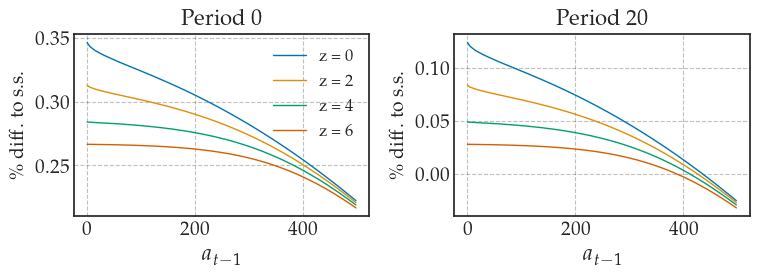

In [14]:
# PIGL Cost-of-Living inequality
fig = figs.show_p_hh(model_baseline, linewidth=1.0)
fig.savefig('plots/p_hh.png', dpi=300, bbox_inches='tight')